# A notebook to plot and analyse topographic profiles

This notebook contains a script to upload and plot topographic profiles that run perpendicular to some feature.

The plots below include the average (mean) elevation, elevations centred on
the lowest point of each profile, and multi-panelled plots to display these features alongside each other.

## Import necessary libraries

Matplotlib and Numpy are used to plot and anlyse the data.

files and io are used to import files, and parse file names.

Seaborn is used for optional styling.**bold text**

In [1]:
# import statements

from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import io
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib as mpl


mpl.rc_file_defaults()

## Upload profiles

Run the following cell to launch the file upload dialogue.

If you have already uploaded some files, re-uploading files with the same names will lead to filenames such as "Profile_1 (1).txt" which will then effect the later filename parsing.

If you want to re-upload files, please select "Disconnect and delete runtime" from the "Runtime" menu to avoid this naming issue.

In [2]:
uploaded = files.upload()

Saving Profile_02.txt to Profile_02.txt
Saving Profile_03.txt to Profile_03.txt
Saving Profile_04.txt to Profile_04.txt
Saving Profile_05.txt to Profile_05.txt
Saving Profile_06.txt to Profile_06.txt
Saving Profile_07.txt to Profile_07.txt
Saving Profile_08.txt to Profile_08.txt
Saving Profile_09.txt to Profile_09.txt
Saving Profile_10.txt to Profile_10.txt
Saving Profile_11.txt to Profile_11.txt
Saving Profile_12.txt to Profile_12.txt
Saving Profile_13.txt to Profile_13.txt
Saving Profile_14.txt to Profile_14.txt
Saving Profile_15.txt to Profile_15.txt
Saving Profile_16.txt to Profile_16.txt
Saving Profile_17.txt to Profile_17.txt
Saving Profile_18.txt to Profile_18.txt
Saving Profile_19.txt to Profile_19.txt
Saving Profile_20.txt to Profile_20.txt
Saving Profile_01.txt to Profile_01.txt


The above dialogue should show you a list of correctly uploaded files. Note that these files are not stored persistently - you should keep a copy on your machine and re-upload when you use this script.

You can check that the profiles will be sorted correctly by printing out the list of files:

In [3]:
print(sorted(uploaded.keys()))

['Profile_01.txt', 'Profile_02.txt', 'Profile_03.txt', 'Profile_04.txt', 'Profile_05.txt', 'Profile_06.txt', 'Profile_07.txt', 'Profile_08.txt', 'Profile_09.txt', 'Profile_10.txt', 'Profile_11.txt', 'Profile_12.txt', 'Profile_13.txt', 'Profile_14.txt', 'Profile_15.txt', 'Profile_16.txt', 'Profile_17.txt', 'Profile_18.txt', 'Profile_19.txt', 'Profile_20.txt']


If this does not return the desired order, please modify your Profile file names to allow for automatic sorting (e.g. inclusion of a numeric value in the title, interrupt the session, and re-upload your files.

## Basic Line Profile Plot

Before running this plot, check that "save_figure" is set to False; when you're happy with the appearance, you can set this to True and modify the file name appropriately.

### Features

This basic plot uses the original file name as a label for each profile line.

Processing: Profile_01.txt
Processing: Profile_02.txt
Processing: Profile_03.txt
Processing: Profile_04.txt
Processing: Profile_05.txt
Processing: Profile_06.txt
Processing: Profile_07.txt
Processing: Profile_08.txt
Processing: Profile_09.txt
Processing: Profile_10.txt
Processing: Profile_11.txt
Processing: Profile_12.txt
Processing: Profile_13.txt
Processing: Profile_14.txt
Processing: Profile_15.txt
Processing: Profile_16.txt
Processing: Profile_17.txt
Processing: Profile_18.txt
Processing: Profile_19.txt
Processing: Profile_20.txt


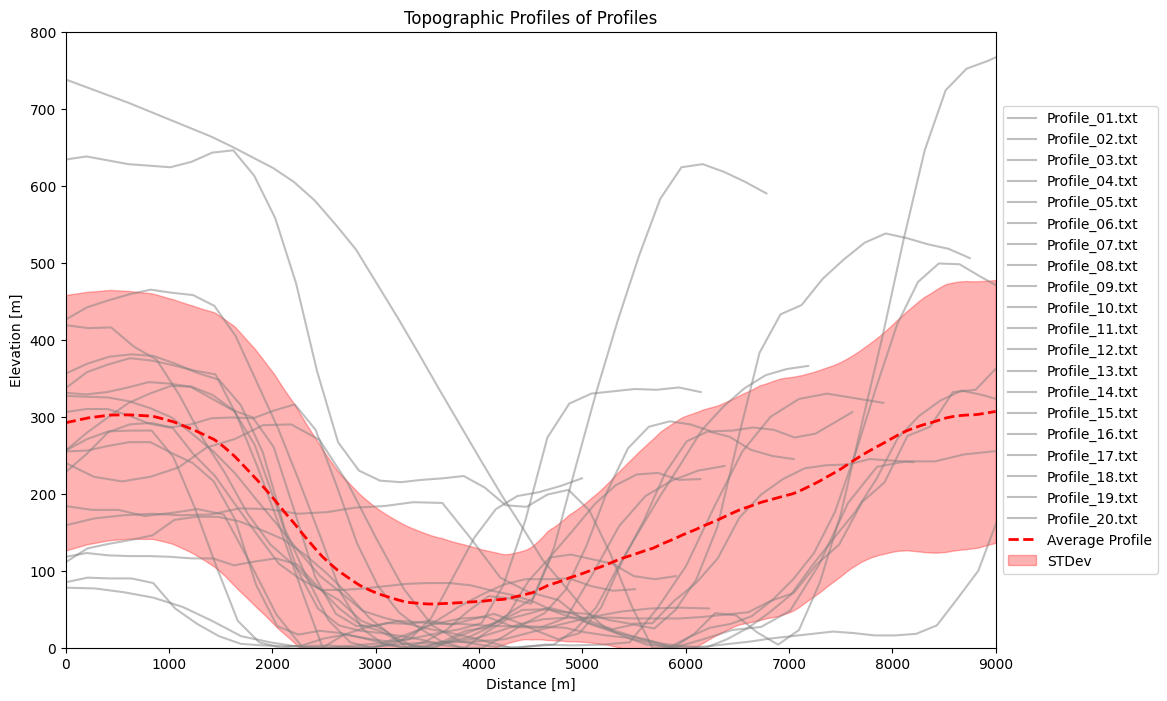

In [4]:
# reset and themes
mpl.rc_file_defaults()

# Original plot

save_figure = False

# Ensure the file name ends in png or svg (depending on which filetype you want)
fig_file_name = "plot02.png"

# Define the range of x and y values to display
x_min = 0  # Minimum x value
x_max = 9000  # Maximum x value
y_min = 0  # Minimum y value
y_max = 800  # Maximum y value

# Define the height and width of the plot
plot_height = 8
plot_width = 12

# Initialize lists to store data from all files
all_x = []
all_y = []

# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    # Shift the profile to have lowest point at 0
    y_shifted = y - np.min(y)

    # Store shifted data for plotting
    all_x.append(x)
    all_y.append(y_shifted)

    # Plot individual file with grey color
    plt.plot(x, y_shifted, label=file_name, color='grey', alpha=0.5)

# Interpolate individual profiles onto a common x axis
common_x = np.linspace(x_min, x_max, num=1000)
interp_y = np.zeros((len(all_y), len(common_x)))

for i, y in enumerate(all_y):
    interp_y[i, :] = np.interp(common_x, all_x[i], y)

# Calculate average profile
avg_y = np.mean(interp_y, axis=0)

# Plot average profile as dashed red line
plt.plot(common_x, avg_y, label='Average Profile', color='red', linestyle='--', linewidth=2)

# Calculate standard deviation of profiles
std_y = np.std(interp_y, axis=0)

# Plot standard deviation as transparent red area around average
plt.fill_between(common_x, avg_y - std_y, avg_y + std_y, color='red', alpha=0.3)

# Set the x and y axis limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Set the height and width of the plot
plt.gcf().set_size_inches(plot_width, plot_height)

# Add labels and legend
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Topographic Profiles of Profiles')

# legend work - need to add a custom patch

# thanks to CreekGeek - https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend

# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()

# manually define a new patch
red_patch = mpatches.Patch(color='red', label='STDev', alpha=0.3)
handles.append(red_patch)

plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as an .svg or .png file

if save_figure:
    plt.savefig(fig_file_name, dpi=600, bbox_inches='tight')
plt.show()

### With formatted profile names

This plot is very similar to the above, but with nicely formatted profile names parsed from the filenames.

First, we can define the name formatting function, and then apply this to the labels.

In [5]:
def format_profile_name(profile_name):
    # Remove the file extension
    formatted_name = profile_name.replace(".txt", "")
    # Replace underscores with spaces
    formatted_name = formatted_name.replace("_", " ")
    return formatted_name

Processing: Profile_01.txt
Processing: Profile_02.txt
Processing: Profile_03.txt
Processing: Profile_04.txt
Processing: Profile_05.txt
Processing: Profile_06.txt
Processing: Profile_07.txt
Processing: Profile_08.txt
Processing: Profile_09.txt
Processing: Profile_10.txt
Processing: Profile_11.txt
Processing: Profile_12.txt
Processing: Profile_13.txt
Processing: Profile_14.txt
Processing: Profile_15.txt
Processing: Profile_16.txt
Processing: Profile_17.txt
Processing: Profile_18.txt
Processing: Profile_19.txt
Processing: Profile_20.txt


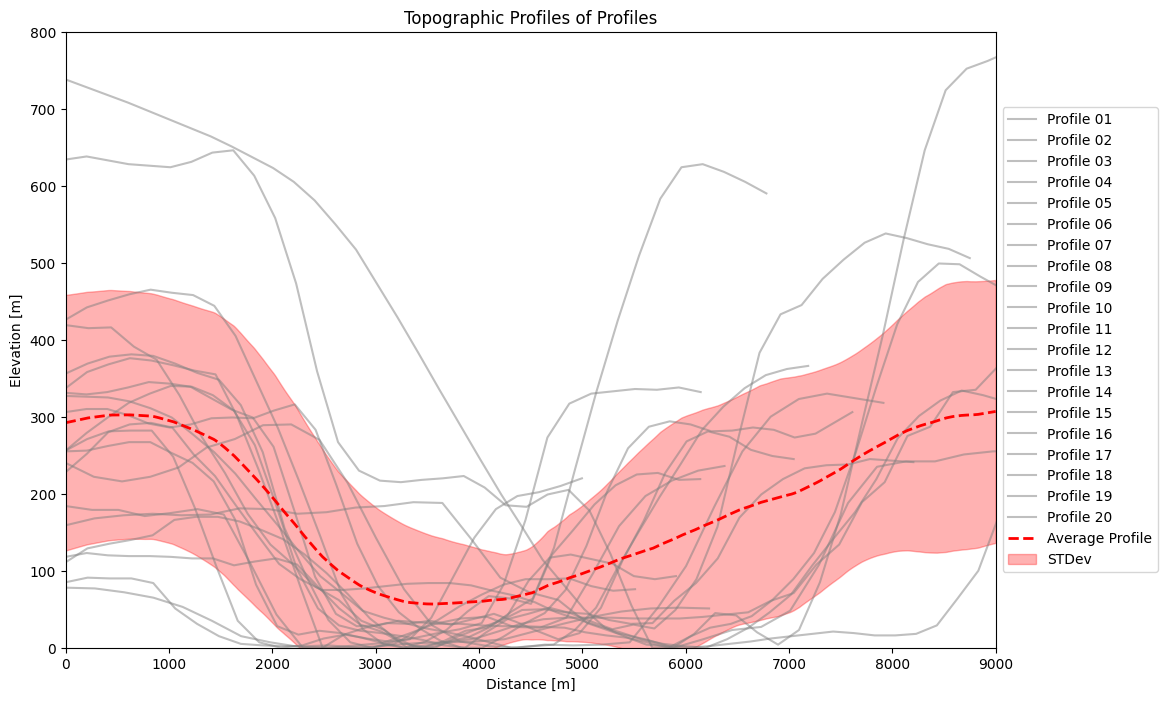

In [6]:
# reset and themes
mpl.rc_file_defaults()

# Original plot

save_figure = False

# Ensure the file name ends in png or svg (depending on which filetype you want)
fig_file_name = "plot01.png"

# Define the range of x and y values to display
x_min = 0  # Minimum x value
x_max = 9000  # Maximum x value
y_min = 0  # Minimum y value
y_max = 800  # Maximum y value

# Define the height and width of the plot
plot_height = 8
plot_width = 12

# Initialize lists to store data from all files
all_x = []
all_y = []

# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    # Shift the profile to have lowest point at 0
    y_shifted = y - np.min(y)

    # Store shifted data for plotting
    all_x.append(x)
    all_y.append(y_shifted)

    # Plot individual file with grey color
    # note we replace "label=file_name" with "label=format_profile_name(file_name)""
    plt.plot(x, y_shifted, label=format_profile_name(file_name), color='grey', alpha=0.5)

# Interpolate individual profiles onto a common x axis
common_x = np.linspace(x_min, x_max, num=1000)
interp_y = np.zeros((len(all_y), len(common_x)))

for i, y in enumerate(all_y):
    interp_y[i, :] = np.interp(common_x, all_x[i], y)

# Calculate average profile
avg_y = np.mean(interp_y, axis=0)

# Plot average profile as dashed red line
plt.plot(common_x, avg_y, label='Average Profile', color='red', linestyle='--', linewidth=2)

# Calculate standard deviation of profiles
std_y = np.std(interp_y, axis=0)

# Plot standard deviation as transparent red area around average
plt.fill_between(common_x, avg_y - std_y, avg_y + std_y, color='red', alpha=0.3)

# Set the x and y axis limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Set the height and width of the plot
plt.gcf().set_size_inches(plot_width, plot_height)

# Add labels and legend
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Topographic Profiles of Profiles')

# legend work - need to add a custom patch

# thanks to CreekGeek - https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend

# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()

# manually define a new patch
red_patch = mpatches.Patch(color='red', label='STDev', alpha=0.3)
handles.append(red_patch)

plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as an .svg or .png file

if save_figure:
    plt.savefig(fig_file_name, dpi=600, bbox_inches='tight')
plt.show()

## Line Profile Plot centred on zero

Now we can do some preprocessing on the profiles to align them with

Processing: Profile_01.txt
Processing: Profile_02.txt
Processing: Profile_03.txt
Processing: Profile_04.txt
Processing: Profile_05.txt
Processing: Profile_06.txt
Processing: Profile_07.txt
Processing: Profile_08.txt
Processing: Profile_09.txt
Processing: Profile_10.txt
Processing: Profile_11.txt
Processing: Profile_12.txt
Processing: Profile_13.txt
Processing: Profile_14.txt
Processing: Profile_15.txt
Processing: Profile_16.txt
Processing: Profile_17.txt
Processing: Profile_18.txt
Processing: Profile_19.txt
Processing: Profile_20.txt


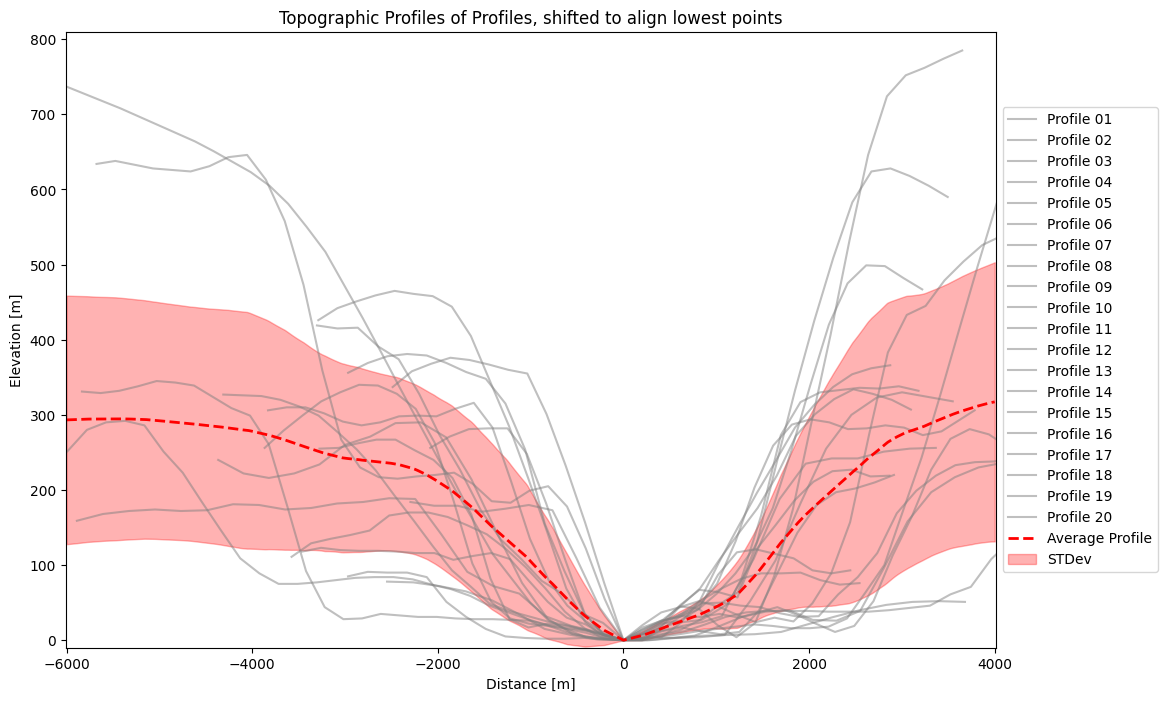

In [7]:
# reset and themes
mpl.rc_file_defaults()

# Original plot

save_figure = False

# Ensure the file name ends in png or svg (depending on which filetype you want)
fig_file_name = "plot01.png"

# Define the range of x and y values to display
x_min = -6000  # Minimum x value
x_max = 4000  # Maximum x value
y_min = 0  # Minimum y value
y_max = 800  # Maximum y value

# Define the height and width of the plot
plot_height = 8
plot_width = 12

# Initialize lists to store data from all files
all_x = []
all_y = []

# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    # Shift the profile to have lowest point at 0
    y_shifted = y - np.min(y)

    # now, align all the y = 0 points
    min_y_index = np.argmin(y)
    x_shifted = x - x[min_y_index]

    # Store shifted data for plotting
    all_x.append(x_shifted)
    all_y.append(y_shifted)

    # Plot individual file with grey color
    # note we replace "label=file_name" with "label=format_profile_name(file_name)""
    plt.plot(x_shifted, y_shifted, label=format_profile_name(file_name), color='grey', alpha=0.5)

# Interpolate individual profiles onto a common x axis
common_x = np.linspace(x_min, x_max, num=1000)
interp_y = np.zeros((len(all_y), len(common_x)))

for i, y in enumerate(all_y):
    interp_y[i, :] = np.interp(common_x, all_x[i], y)

# Calculate average profile
avg_y = np.mean(interp_y, axis=0)

# Plot average profile as dashed red line
plt.plot(common_x, avg_y, label='Average Profile', color='red', linestyle='--', linewidth=2)

# Calculate standard deviation of profiles
std_y = np.std(interp_y, axis=0)

# Plot standard deviation as transparent red area around average
plt.fill_between(common_x, avg_y - std_y, avg_y + std_y, color='red', alpha=0.3)

# Set the x and y axis limits
plt.xlim(x_min-10, x_max+10)
plt.ylim(y_min-10, y_max+10)

# Set the height and width of the plot
plt.gcf().set_size_inches(plot_width, plot_height)

# Add labels and legend
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Topographic Profiles of Profiles, shifted to align lowest points')

# legend work - need to add a custom patch
# thanks to CreekGeek - https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()

# manually define a new patch
red_patch = mpatches.Patch(color='red', label='STDev', alpha=0.3)
handles.append(red_patch)

plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as an .svg or .png file

if save_figure:
    plt.savefig(fig_file_name, dpi=600, bbox_inches='tight')
plt.show()

### With colours for different profiles

In order to discriminate the different profiles, we can colour them using a heatmap.

Processing: Profile_01.txt
Processing: Profile_02.txt
Processing: Profile_03.txt
Processing: Profile_04.txt
Processing: Profile_05.txt
Processing: Profile_06.txt
Processing: Profile_07.txt
Processing: Profile_08.txt
Processing: Profile_09.txt
Processing: Profile_10.txt
Processing: Profile_11.txt
Processing: Profile_12.txt
Processing: Profile_13.txt
Processing: Profile_14.txt
Processing: Profile_15.txt
Processing: Profile_16.txt
Processing: Profile_17.txt
Processing: Profile_18.txt
Processing: Profile_19.txt
Processing: Profile_20.txt


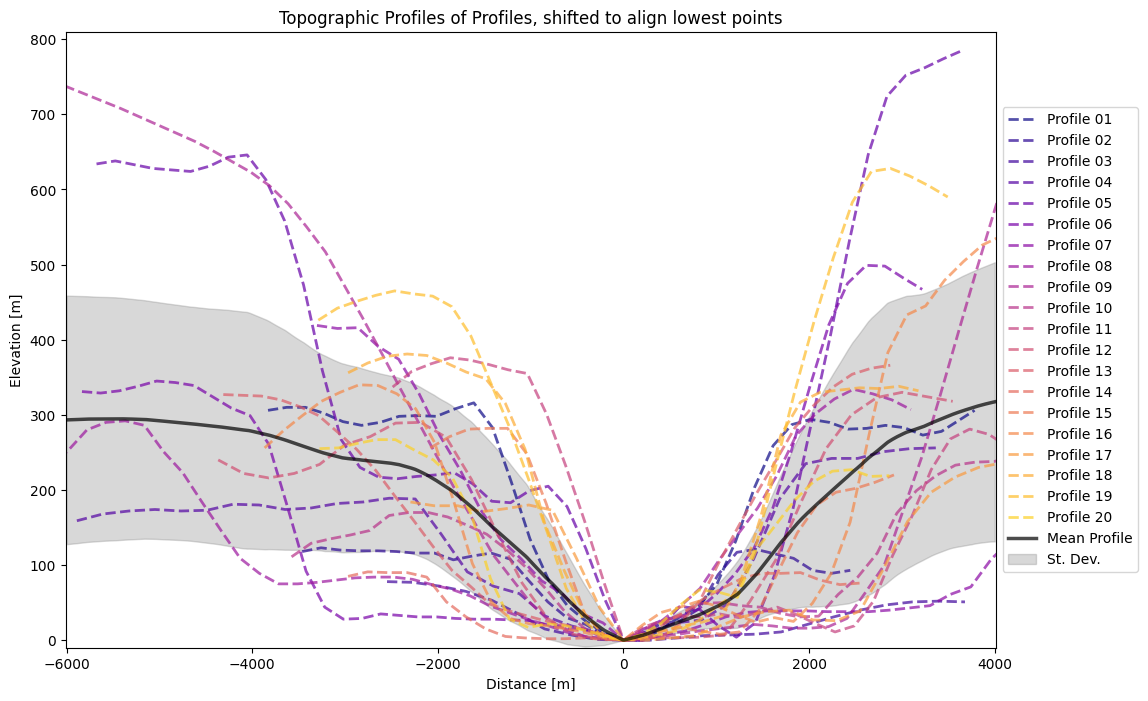

In [8]:
# reset and themes
mpl.rc_file_defaults()

# Original plot

save_figure = False

# Ensure the file name ends in png or svg (depending on which filetype you want)
fig_file_name = "plot01.png"

# Define the range of x and y values to display
x_min = -6000  # Minimum x value
x_max = 4000  # Maximum x value
y_min = 0  # Minimum y value
y_max = 800  # Maximum y value

# Define the height and width of the plot
plot_height = 8
plot_width = 12

# Initialize lists to store data from all files
all_x = []
all_y = []

# cycle through a colourmap

# have chosen "plasma" here - you can google matplotlib colormaps
# to see other available maps
n = len(uploaded.keys())
colors = plt.cm.plasma(np.linspace(0,1,n+2))
i = 0

# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    # Shift the profile to have lowest point at 0
    y_shifted = y - np.min(y)

    # now, align all the y = 0 points
    min_y_index = np.argmin(y)
    x_shifted = x - x[min_y_index]

    # Store shifted data for plotting
    all_x.append(x_shifted)
    all_y.append(y_shifted)

    # Plot individual file with grey color
    # note we replace "label=file_name" with "label=format_profile_name(file_name)""
    plt.plot(x_shifted, y_shifted, label=format_profile_name(file_name), color=colors[i], ls="--", lw=2, alpha=0.7)
    i+=1

# Interpolate individual profiles onto a common x axis
common_x = np.linspace(x_min, x_max, num=1000)
interp_y = np.zeros((len(all_y), len(common_x)))

for i, y in enumerate(all_y):
    interp_y[i, :] = np.interp(common_x, all_x[i], y)

# Calculate average profile
avg_y = np.mean(interp_y, axis=0)

# Plot average profile as dashed red line
plt.plot(common_x, avg_y, label='Mean Profile', color='k', linestyle='-', linewidth=2.5, alpha=0.7)

# Calculate standard deviation of profiles
std_y = np.std(interp_y, axis=0)

# Plot standard deviation as transparent red area around average
plt.fill_between(common_x, avg_y - std_y, avg_y + std_y, color='grey', alpha=0.3)

# Set the x and y axis limits
plt.xlim(x_min-10, x_max+10)
plt.ylim(y_min-10, y_max+10)

# Set the height and width of the plot
plt.gcf().set_size_inches(plot_width, plot_height)

# Add labels and legend
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Topographic Profiles of Profiles, shifted to align lowest points')

# legend work - need to add a custom patch
# thanks to CreekGeek - https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()

# manually define a new patch
red_patch = mpatches.Patch(color='grey', label='St. Dev.', alpha=0.3)
handles.append(red_patch)

plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as an .svg or .png file

if save_figure:
    plt.savefig(fig_file_name, dpi=600, bbox_inches='tight')
plt.show()

## Other statistical measures

We can add other measures of variance or average to the plot, such as the peak to peak profile - https://numpy.org/doc/stable/reference/generated/numpy.ptp.html

Processing: Profile_01.txt
Processing: Profile_02.txt
Processing: Profile_03.txt
Processing: Profile_04.txt
Processing: Profile_05.txt
Processing: Profile_06.txt
Processing: Profile_07.txt
Processing: Profile_08.txt
Processing: Profile_09.txt
Processing: Profile_10.txt
Processing: Profile_11.txt
Processing: Profile_12.txt
Processing: Profile_13.txt
Processing: Profile_14.txt
Processing: Profile_15.txt
Processing: Profile_16.txt
Processing: Profile_17.txt
Processing: Profile_18.txt
Processing: Profile_19.txt
Processing: Profile_20.txt


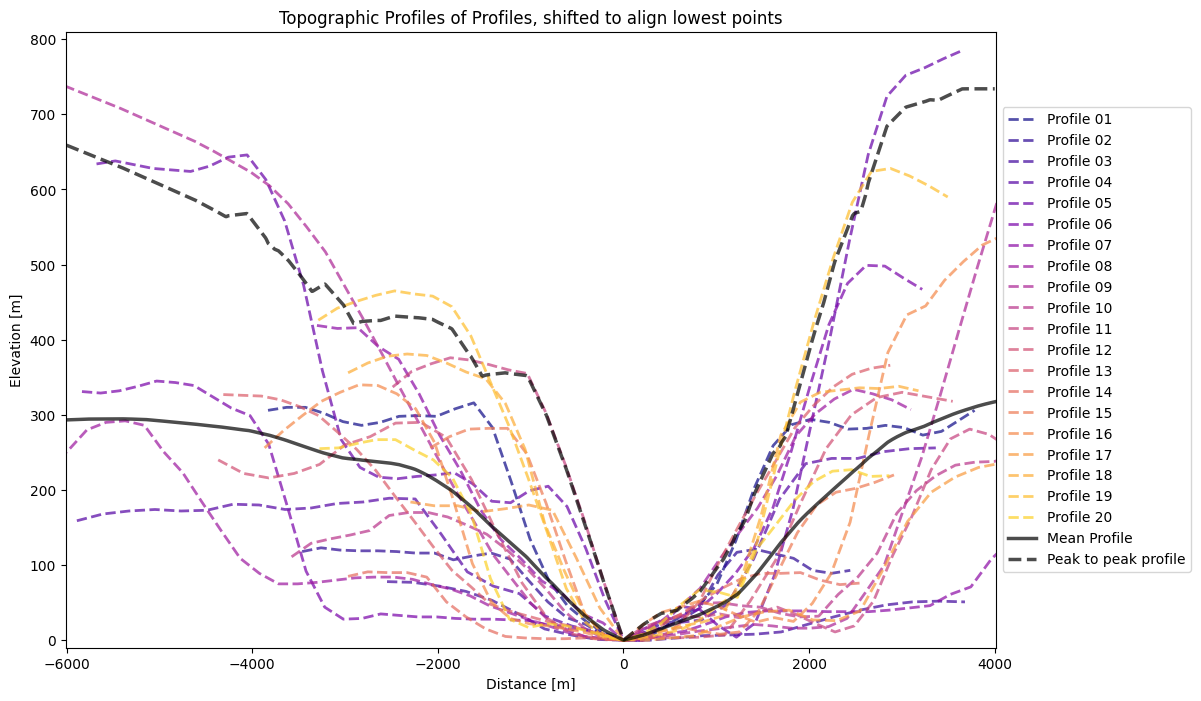

In [9]:
# reset and themes
mpl.rc_file_defaults()

# Original plot

save_figure = False

# Ensure the file name ends in png or svg (depending on which filetype you want)
fig_file_name = "plot01.png"

# Define the range of x and y values to display
x_min = -6000  # Minimum x value
x_max = 4000  # Maximum x value
y_min = 0  # Minimum y value
y_max = 800  # Maximum y value

# Define the height and width of the plot
plot_height = 8
plot_width = 12

# Initialize lists to store data from all files
all_x = []
all_y = []

# cycle through a colourmap

# have chosen "plasma" here - you can google matplotlib colormaps
# to see other available maps
n = len(uploaded.keys())
colors = plt.cm.plasma(np.linspace(0,1,n+2))
i = 0

# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    # Shift the profile to have lowest point at 0
    y_shifted = y - np.min(y)

    # now, align all the y = 0 points
    min_y_index = np.argmin(y)
    x_shifted = x - x[min_y_index]

    # Store shifted data for plotting
    all_x.append(x_shifted)
    all_y.append(y_shifted)

    # Plot individual file with grey color
    # note we replace "label=file_name" with "label=format_profile_name(file_name)""
    plt.plot(x_shifted, y_shifted, label=format_profile_name(file_name), color=colors[i], ls="--", lw=2, alpha=0.7)
    i+=1

# Interpolate individual profiles onto a common x axis
common_x = np.linspace(x_min, x_max, num=1000)
interp_y = np.zeros((len(all_y), len(common_x)))

for i, y in enumerate(all_y):
    interp_y[i, :] = np.interp(common_x, all_x[i], y)

# measures of middle

# Calculate average profile
avg_y = np.mean(interp_y, axis=0)
ptp = np.ptp(interp_y, axis=0)


# Plot average profile as dashed red line
plt.plot(common_x, avg_y, label='Mean Profile', color='k', linestyle='-', linewidth=2.5, alpha=0.7)
plt.plot(common_x, ptp, label='Peak to peak profile', color='k', linestyle='--', linewidth=2.5, alpha=0.7)


# Calculate standard deviation of profiles
std_y = np.std(interp_y, axis=0)

# Plot standard deviation as transparent red area around average
# plt.fill_between(common_x, avg_y - std_y, avg_y + std_y, color='grey', alpha=0.3)

# Set the x and y axis limits
plt.xlim(x_min-10, x_max+10)
plt.ylim(y_min-10, y_max+10)

# Set the height and width of the plot
plt.gcf().set_size_inches(plot_width, plot_height)

# Add labels and legend
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Topographic Profiles of Profiles, shifted to align lowest points')

# legend work - need to add a custom patch
# thanks to CreekGeek - https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()

# manually define a new patch
# red_patch = mpatches.Patch(color='grey', label='St. Dev.', alpha=0.3)
# handles.append(red_patch)

plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as an .svg or .png file

if save_figure:
    plt.savefig(fig_file_name, dpi=600, bbox_inches='tight')
plt.show()

## Without a common y value

Processing: Profile_01.txt
19
Processing: Profile_02.txt
17
Processing: Profile_03.txt
9
Processing: Profile_04.txt
21
Processing: Profile_05.txt
28
Processing: Profile_06.txt
29
Processing: Profile_07.txt
15
Processing: Profile_08.txt
30
Processing: Profile_09.txt
30
Processing: Profile_10.txt
17
Processing: Profile_11.txt
12
Processing: Profile_12.txt
16
Processing: Profile_13.txt
21
Processing: Profile_14.txt
14
Processing: Profile_15.txt
10
Processing: Profile_16.txt
19
Processing: Profile_17.txt
9
Processing: Profile_18.txt
14
Processing: Profile_19.txt
16
Processing: Profile_20.txt
16


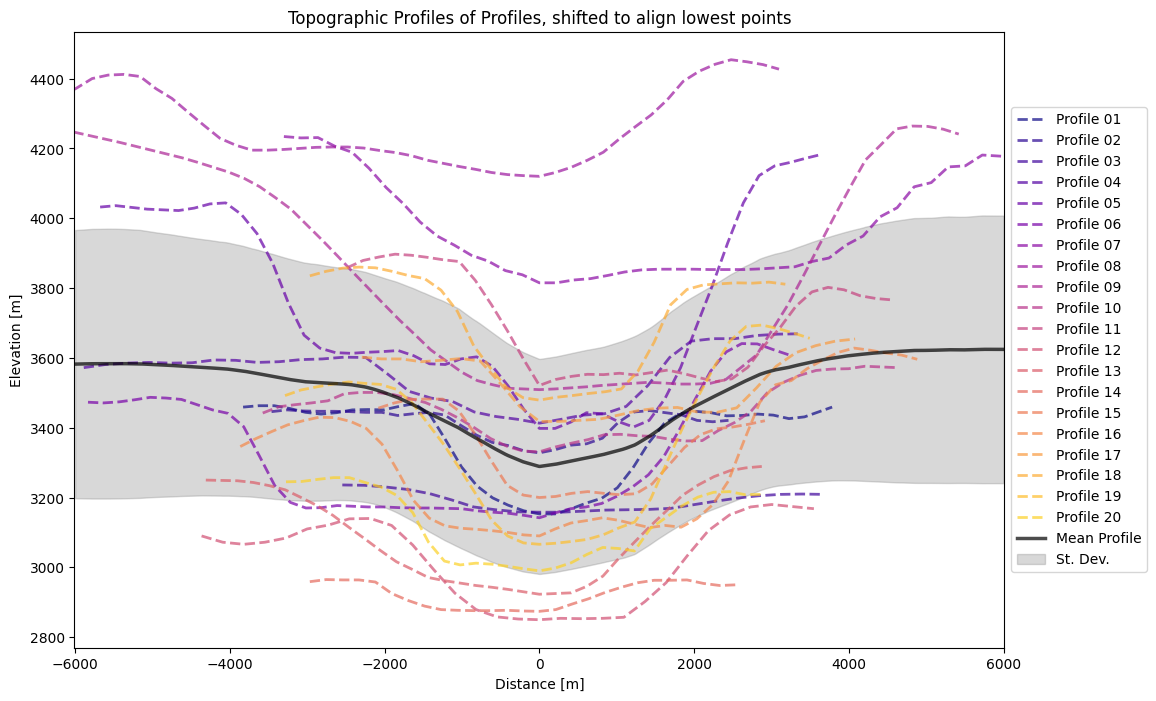

In [10]:
# reset and themes
mpl.rc_file_defaults()

# Original plot

save_figure = False

# Ensure the file name ends in png or svg (depending on which filetype you want)
fig_file_name = "plot01.png"

# Define the range of x and y values to display
x_min = -6000  # Minimum x value
x_max = 6000  # Maximum x value
y_min = 0  # Minimum y value
y_max = 800  # Maximum y value

# Define the height and width of the plot
plot_height = 8
plot_width = 12

# Initialize lists to store data from all files
all_x = []
all_y = []

# cycle through a colourmap

# have chosen "plasma" here - you can google matplotlib colormaps
# to see other available maps
n = len(uploaded.keys())
colors = plt.cm.plasma(np.linspace(0,1,n+2))
i = 0

# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    # DONT Shift the profile to have lowest point at 0
    y_shifted = y # - np.min(y)

    # now, align all the y = 0 points
    min_y_index = np.argmin(y)
    print(min_y_index )
    x_shifted = x - x[min_y_index]

    # Store shifted data for plotting
    all_x.append(x_shifted)
    all_y.append(y_shifted)

    # Plot individual file with grey color
    # note we replace "label=file_name" with "label=format_profile_name(file_name)""
    plt.plot(x_shifted, y_shifted, label=format_profile_name(file_name), color=colors[i], ls="--", lw=2, alpha=0.7)
    i+=1

# Interpolate individual profiles onto a common x axis
common_x = np.linspace(x_min, x_max, num=1000)
interp_y = np.zeros((len(all_y), len(common_x)))

for i, y in enumerate(all_y):
    interp_y[i, :] = np.interp(common_x, all_x[i], y)

# Calculate average profile
avg_y = np.mean(interp_y, axis=0)

# Plot average profile as dashed red line
plt.plot(common_x, avg_y, label='Mean Profile', color='k', linestyle='-', linewidth=2.5, alpha=0.7)

# Calculate standard deviation of profiles
std_y = np.std(interp_y, axis=0)

# Plot standard deviation as transparent red area around average
plt.fill_between(common_x, avg_y - std_y, avg_y + std_y, color='grey', alpha=0.3)

# Set the x and y axis limits
plt.xlim(x_min-10, x_max+10)
# plt.ylim(y_min-10, y_max+10)

# Set the height and width of the plot
plt.gcf().set_size_inches(plot_width, plot_height)

# Add labels and legend
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Topographic Profiles of Profiles, shifted to align lowest points')

# legend work - need to add a custom patch
# thanks to CreekGeek - https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()

# manually define a new patch
red_patch = mpatches.Patch(color='grey', label='St. Dev.', alpha=0.3)
handles.append(red_patch)

plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as an .svg or .png file

if save_figure:
    plt.savefig(fig_file_name, dpi=600, bbox_inches='tight')
plt.show()

# Aligning with rate of change values

Instead of aligning based on the minimum y (which may a little bit between plots), we can instead investigate using the slope.

Before we do this, we should check that the spacing is of each of the profiles, both to check that this is consistent within the profiles and also to check how much this varies across profiles.

In [11]:
# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    if all(np.isclose(np.diff(x), np.diff(x)[0], atol=1e-6)):
        print("Spacing = ", x[1] - x[0])
    else:
        print("Spacing not equal")
        print("Variations of ", max(np.diff(x) - np.diff(x)[0]))

Processing: Profile_01.txt
Spacing not equal
Variations of  155.30413304152898
Processing: Profile_02.txt
Spacing =  203.65642708643418
Processing: Profile_03.txt
Spacing not equal
Variations of  1.7053025658242404e-13
Processing: Profile_04.txt
Spacing not equal
Variations of  1.3642420526593924e-12
Processing: Profile_05.txt
Spacing =  202.7667563838202
Processing: Profile_06.txt
Spacing =  201.18213791892984
Processing: Profile_07.txt
Spacing =  220.16954172706727
Processing: Profile_08.txt
Spacing =  206.46196665569343
Processing: Profile_09.txt
Spacing =  200.7384713182678
Processing: Profile_10.txt
Spacing =  210.35070509910156
Processing: Profile_11.txt
Spacing =  207.22327422402716
Processing: Profile_12.txt
Spacing =  272.8948645855486
Processing: Profile_13.txt
Spacing =  205.30831727944587
Processing: Profile_14.txt
Spacing =  211.94792397231723
Processing: Profile_15.txt
Spacing =  208.1736250288474
Processing: Profile_16.txt
Spacing =  203.47817470211223
Processing: Profil

As long as none of these variation differences are too high, you can proceed and calculate the gradient using a fixed spacing parameter.

# Align plots based on the minimum slope

This will align plots based on the steepest slope on the LHS. Like the earlier plots, these still set y = 0 at the lowest point for each profile.

Processing: Profile_01.txt
Processing: Profile_02.txt
Processing: Profile_03.txt
Processing: Profile_04.txt
Processing: Profile_05.txt
Processing: Profile_06.txt
Processing: Profile_07.txt
Processing: Profile_08.txt
Processing: Profile_09.txt
Processing: Profile_10.txt
Processing: Profile_11.txt
Processing: Profile_12.txt
Processing: Profile_13.txt
Processing: Profile_14.txt
Processing: Profile_15.txt
Processing: Profile_16.txt
Processing: Profile_17.txt
Processing: Profile_18.txt
Processing: Profile_19.txt
Processing: Profile_20.txt


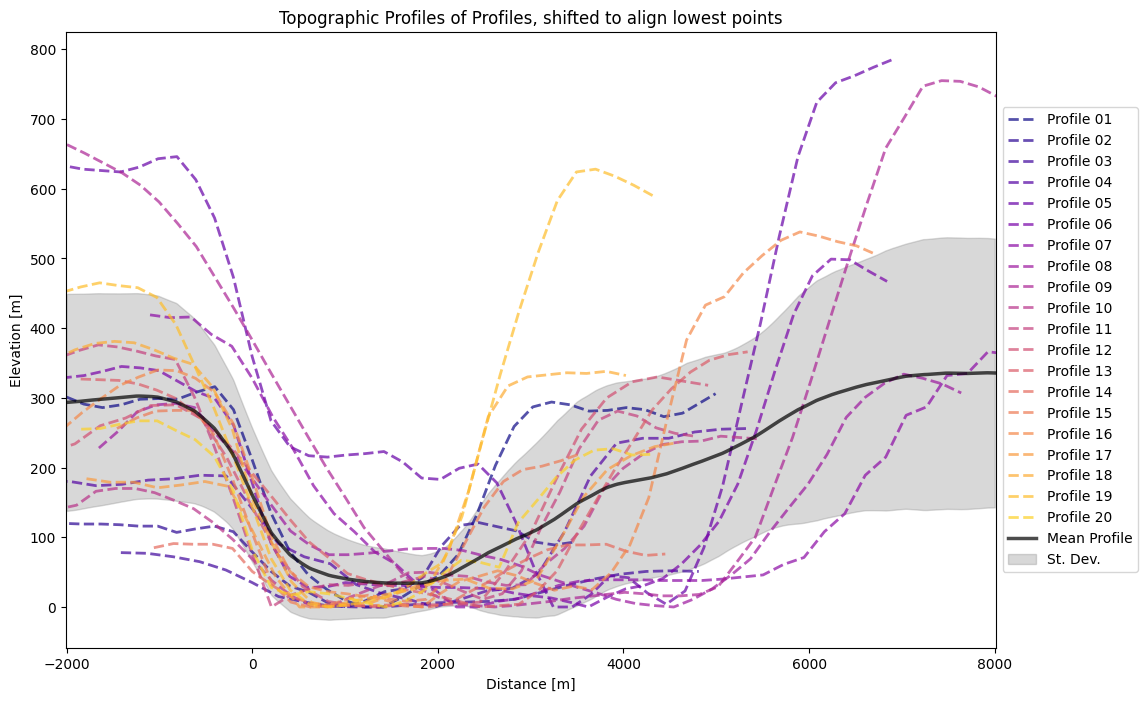

In [12]:
# reset and themes
mpl.rc_file_defaults()

# Original plot

save_figure = False

# Ensure the file name ends in png or svg (depending on which filetype you want)
fig_file_name = "plot01.png"

# Define the range of x and y values to display
x_min = -2000  # Minimum x value
x_max = 8000  # Maximum x value
y_min = 0  # Minimum y value
y_max = 800  # Maximum y value

# Define the height and width of the plot
plot_height = 8
plot_width = 12

# Initialize lists to store data from all files
all_x = []
all_y = []

# cycle through a colourmap

# have chosen "plasma" here - you can google matplotlib colormaps
# to see other available maps
n = len(uploaded.keys())
colors = plt.cm.plasma(np.linspace(0,1,n+2))
i = 0

# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    spacing = x[1] - x[0]
    y_grad = np.gradient(y, spacing)

    # Shift the profile to have lowest point at y = 0
    y_shifted = y - np.min(y)

    # now, align based on min of ygrad

    min_y_index = np.argmin(y_grad)
    x_shifted = x - x[min_y_index]


    # Store shifted data for plotting
    all_x.append(x_shifted)
    all_y.append(y_shifted)

    # Plot individual file with grey color
    # note we replace "label=file_name" with "label=format_profile_name(file_name)""
    plt.plot(x_shifted, y_shifted, label=format_profile_name(file_name), color=colors[i], ls="--", lw=2, alpha=0.7)
    i+=1

# Interpolate individual profiles onto a common x axis
common_x = np.linspace(x_min, x_max, num=1000)
interp_y = np.zeros((len(all_y), len(common_x)))

for i, y in enumerate(all_y):
    interp_y[i, :] = np.interp(common_x, all_x[i], y)

# Calculate average profile
avg_y = np.mean(interp_y, axis=0)

# Plot average profile as dashed red line
plt.plot(common_x, avg_y, label='Mean Profile', color='k', linestyle='-', linewidth=2.5, alpha=0.7)

# Calculate standard deviation of profiles
std_y = np.std(interp_y, axis=0)

# Plot standard deviation as transparent red area around average
plt.fill_between(common_x, avg_y - std_y, avg_y + std_y, color='grey', alpha=0.3)

# Set the x and y axis limits
plt.xlim(x_min-10, x_max+10)
# plt.ylim(y_min-10, y_max+10)

# Set the height and width of the plot
plt.gcf().set_size_inches(plot_width, plot_height)

# Add labels and legend
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Topographic Profiles of Profiles, shifted to align lowest points')

# legend work - need to add a custom patch
# thanks to CreekGeek - https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()

# manually define a new patch
red_patch = mpatches.Patch(color='grey', label='St. Dev.', alpha=0.3)
handles.append(red_patch)

plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as an .svg or .png file

if save_figure:
    plt.savefig(fig_file_name, dpi=600, bbox_inches='tight')
plt.show()

# Align plots based on the maximum slope

This will align the plots based on the RHS ledge.

Like the earlier plots, these still align y = 0 where the profiles have their minimum value.

Processing: Profile_01.txt
Processing: Profile_02.txt
Processing: Profile_03.txt
Processing: Profile_04.txt
Processing: Profile_05.txt
Processing: Profile_06.txt
Processing: Profile_07.txt
Processing: Profile_08.txt
Processing: Profile_09.txt
Processing: Profile_10.txt
Processing: Profile_11.txt
Processing: Profile_12.txt
Processing: Profile_13.txt
Processing: Profile_14.txt
Processing: Profile_15.txt
Processing: Profile_16.txt
Processing: Profile_17.txt
Processing: Profile_18.txt
Processing: Profile_19.txt
Processing: Profile_20.txt


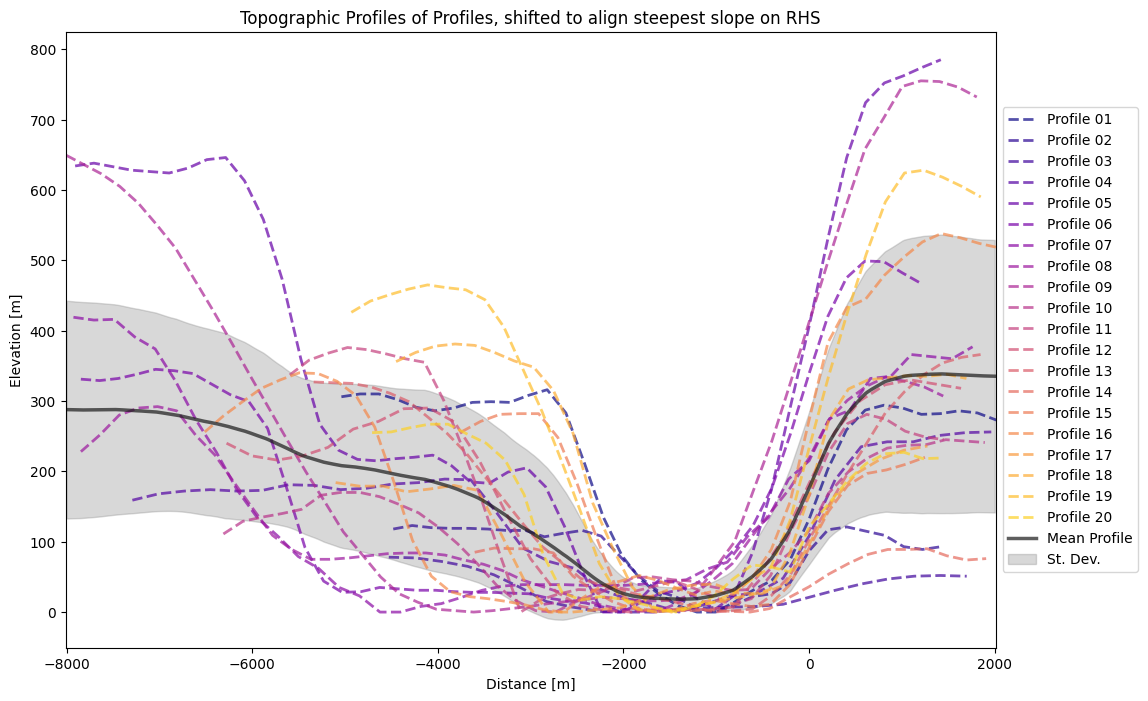

In [15]:
# reset and themes
mpl.rc_file_defaults()

# Original plot

save_figure = False

# Ensure the file name ends in png or svg (depending on which filetype you want)
fig_file_name = "plot01.png"

# Define the range of x and y values to display
x_min = -8000  # Minimum x value
x_max = 2000  # Maximum x value
y_min = 0  # Minimum y value
y_max = 800  # Maximum y value

# Define the height and width of the plot
plot_height = 8
plot_width = 12

# Initialize lists to store data from all files
all_x = []
all_y = []

# cycle through a colourmap

# have chosen "plasma" here - you can google matplotlib colormaps
# to see other available maps
n = len(uploaded.keys())
colors = plt.cm.plasma(np.linspace(0,1,n+2))
i = 0

# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    spacing = x[1] - x[0]
    y_grad = np.gradient(y, spacing)

    # Shift the profile to have lowest point at y = 0
    y_shifted = y - np.min(y)

    # now, align based on max of ygrad

    max_y_index = np.argmax(y_grad)
    x_shifted = x - x[max_y_index]


    # Store shifted data for plotting
    all_x.append(x_shifted)
    all_y.append(y_shifted)

    # Plot individual file with grey color
    # note we replace "label=file_name" with "label=format_profile_name(file_name)""
    plt.plot(x_shifted, y_shifted, label=format_profile_name(file_name), color=colors[i], ls="--", lw=2, alpha=0.7)
    i+=1

# Interpolate individual profiles onto a common x axis
common_x = np.linspace(x_min, x_max, num=1000)
interp_y = np.zeros((len(all_y), len(common_x)))

for i, y in enumerate(all_y):
    interp_y[i, :] = np.interp(common_x, all_x[i], y)

# Calculate average profile
avg_y = np.mean(interp_y, axis=0)

# Plot average profile as dashed red line
plt.plot(common_x, avg_y, label='Mean Profile', color='k', linestyle='-', linewidth=2.5, alpha=0.7)

# Calculate standard deviation of profiles
std_y = np.std(interp_y, axis=0)

# Plot standard deviation as transparent red area around average
plt.fill_between(common_x, avg_y - std_y, avg_y + std_y, color='grey', alpha=0.3)

# Set the x and y axis limits
plt.xlim(x_min-10, x_max+10)
# plt.ylim(y_min-10, y_max+10)

# Set the height and width of the plot
plt.gcf().set_size_inches(plot_width, plot_height)

# Add labels and legend
plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Topographic Profiles of Profiles, shifted to align steepest slope on RHS')

# legend work - need to add a custom patch
# thanks to CreekGeek - https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()

# manually define a new patch
red_patch = mpatches.Patch(color='grey', label='St. Dev.', alpha=0.3)
handles.append(red_patch)

plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot as an .svg or .png file

if save_figure:
    plt.savefig(fig_file_name, dpi=600, bbox_inches='tight')
plt.show()

# Other plots

Here are a selection of other plots that might be useful.

Al the end, I will add a selection of multi-grid plots with different figures in them.

In [39]:
def format_profile_name_2(profile_name):
    # Remove the file extension
    formatted_name = profile_name.replace(".txt", "")
    # Replace Profile and underscore
    formatted_name = formatted_name.replace("Profile_", " ")
    return formatted_name

Processing: Profile_01.txt
Processing: Profile_02.txt
Processing: Profile_03.txt
Processing: Profile_04.txt
Processing: Profile_05.txt
Processing: Profile_06.txt
Processing: Profile_07.txt
Processing: Profile_08.txt
Processing: Profile_09.txt
Processing: Profile_10.txt
Processing: Profile_11.txt
Processing: Profile_12.txt
Processing: Profile_13.txt
Processing: Profile_14.txt
Processing: Profile_15.txt
Processing: Profile_16.txt
Processing: Profile_17.txt
Processing: Profile_18.txt
Processing: Profile_19.txt
Processing: Profile_20.txt


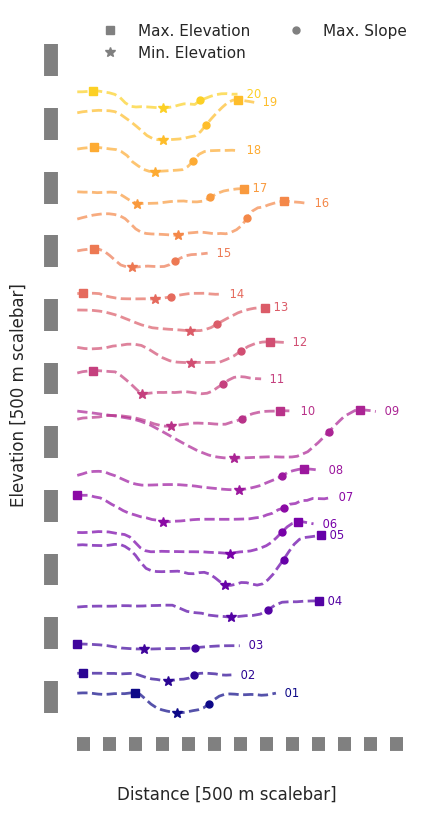

In [40]:
# reset and themes
mpl.rc_file_defaults()

# using seaborn theme
sns.set_theme(style="white")

# Original plot

save_figure = False

# Ensure the file name ends in png or svg (depending on which filetype you want)
fig_file_name = "plot01.png"

# Define the range of x and y values to display
x_min = -8000  # Minimum x value
x_max = 2000  # Maximum x value
y_min = 0  # Minimum y value
y_max = 800  # Maximum y value

# Define the height and width of the plot
plot_height = 10
plot_width = 5

# Initialize lists to store data from all files
all_x = []
all_y = []

# cycle through a colourmap

# have chosen "plasma" here - you can google matplotlib colormaps
# to see other available maps
n = len(uploaded.keys())
colors = plt.cm.plasma(np.linspace(0,1,n+2))
i = 0

base_value = 0
increment = 500

# Loop through each uploaded file
for file_name in sorted(uploaded.keys()):
    print("Processing:", file_name)

    # Read the file with tab ('\t') as the delimiter
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter='\t', names=True)

    # Extract x and y data
    x = data['x']
    y = data['y']

    # Shift the profile to have lowest point at y = 0
    y_shifted = (y - np.min(y)) + base_value
    # shift values up along y
    base_value = base_value + increment

    # find the minimum y to plot
    min_y_val = np.argmin(y_shifted)
    min_y_x = x[min_y_val]
    new_min_y = np.min(y_shifted)

    # find maximum slope change (rhs)
    spacing = x[1] - x[0]
    y_grad = np.gradient(y, spacing)
    max_y_slope_index = np.argmax(y_grad)
    max_y_slope_x = x[max_y_slope_index]
    max_y_slope = y_shifted[max_y_slope_index]

    # calculating actual maximum y value
    max_y_val = np.argmax(y_shifted)
    max_y_x = x[max_y_val]
    new_max_y = np.max(y_shifted)



    x_shifted = x # don't shift


    # Store shifted data for plotting
    all_x.append(x_shifted)
    all_y.append(y_shifted)

    # plot each profile
    plt.plot(x_shifted, y_shifted,color=colors[i], ls="--", lw=2, alpha=0.7)

    # plot each profile name - if you want to change this to actually say profile, remove the "_2" from the function call
    plt.text(x_shifted[-1]+ 200, y_shifted[-1] - 50, format_profile_name_2(file_name), color=colors[i], size="x-small")

    # These define different points on the line
    # Maybe if you use like the "Max slope" on rhs to align the profiles in another plot
    # (like in the last plot)
    # You could then include this point to show like how they were aligned/where that point is
    # It also shows like why the centre deepest point/highest point might not be a good place to align (because it jumps from side to side)
    plt.plot(max_y_x, new_max_y , marker = "s", color=colors[i], ms=6, label = "Max. Elev.")
    plt.plot(min_y_x, new_min_y , marker = "*", color=colors[i], ms=7, label="Min. Elev.")
    plt.plot(max_y_slope_x, max_y_slope , marker = "o", color=colors[i], ms=5, label="Max slope")

    i+=1

# Interpolate individual profiles onto a common x axis
common_x = np.linspace(x_min, x_max, num=1000)
interp_y = np.zeros((len(all_y), len(common_x)))

for i, y in enumerate(all_y):
    interp_y[i, :] = np.interp(common_x, all_x[i], y)

# Calculate average profile
avg_y = np.mean(interp_y, axis=0)


# Calculate standard deviation of profiles
std_y = np.std(interp_y, axis=0)


# Set the height and width of the plot
plt.gcf().set_size_inches(plot_width, plot_height)


plt.gca().set(yticks=[], ylabel="Elevation [500 m scalebar]")
plt.gca().set(xticks=[], xlabel="Distance [500 m scalebar]")
sns.despine(left=True, bottom=True)

j = 0
while j < 11000:
    plt.plot([-1000, -1000], [j, j + 500], lw = 10, solid_capstyle="butt", c="grey")
    j += 1000

j = 0
while j < 12100:
    plt.plot([j, j + 500], [-500, -500], lw = 10, solid_capstyle="butt", c="grey")
    j += 1000


# create manual legend handles
max_elev = Line2D([0], [0], marker='s', markersize=6,
         markeredgecolor='grey', markerfacecolor='grey', linestyle='')

min_elev = Line2D([0], [0], marker='*', markersize=7,
         markeredgecolor='grey', markerfacecolor='grey', linestyle='')

max_slope = Line2D([0], [0], marker='o', markersize=5,
         markeredgecolor='grey', markerfacecolor='grey', linestyle='')

handles = [max_elev, min_elev, max_slope]
labels = ["Max. Elevation", "Min. Elevation", "Max. Slope"]

plt.legend(handles, labels, frameon=False, ncol=2)

# Save the plot as an .svg or .png file

if save_figure:
    plt.savefig(fig_file_name, dpi=600, bbox_inches='tight')
plt.show()